# Iris Classification

## 1. Load libraries

In [19]:
import pandas
import sklearn
import matplotlib

## 2. Load dataset

From './data/iris.name':

> 7. Attribute Information:
>   1. sepal length in cm
>   2. sepal width in cm
>   3. petal length in cm
>   4. petal width in cm
>   5. class: 
>      -- Iris Setosa
>      -- Iris Versicolour
>      -- Iris Virginica

In [20]:
url = "./data/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

### 2.1. Dataset shape

In [21]:
print(dataset.shape)

(150, 5)


### 2.2. Dataset head

In [22]:
print(dataset.head(5))

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


### 2.3. Statistical summary

In [23]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### 2.4. Group by class

In [24]:
# rows that belong to a class (setosa, versicolour, ...)
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## 3. Visualize the data

### 3.1. Univariate plots

#### 3.1.1. Box-and-Whisker

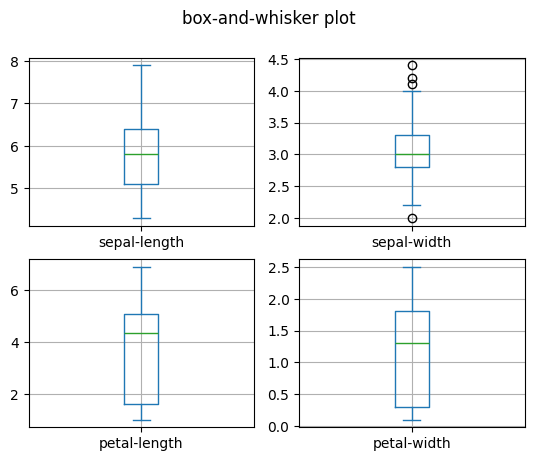

In [25]:
dataset.plot(title="box-and-whisker plot",grid=True,kind="box",subplots=True,layout=(2,2))
matplotlib.pyplot.show()

#### 3.1.2. Histograms

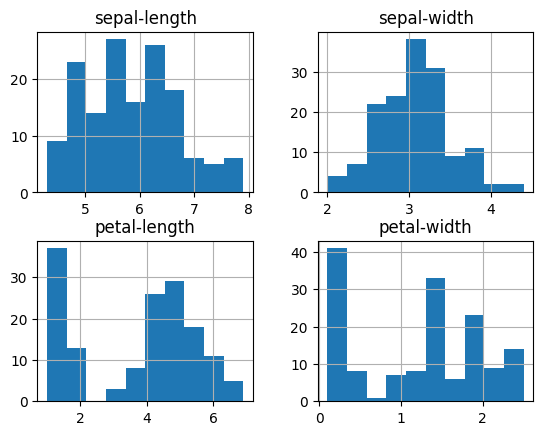

In [26]:
dataset.hist()
matplotlib.pyplot.show()

### 3.2. Multivariate plots

#### 3.2.1. Scatter plot matrix

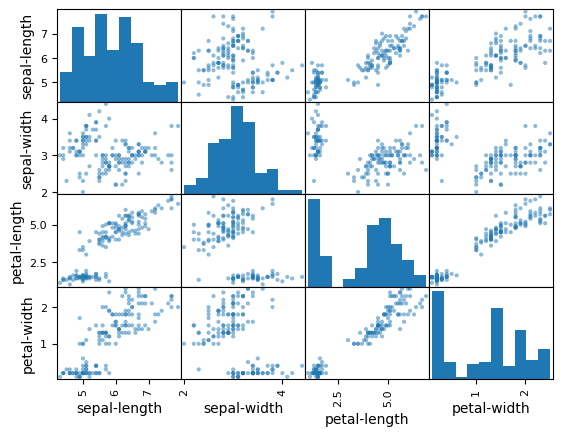

In [27]:
pandas.plotting.scatter_matrix(dataset)
matplotlib.pyplot.show()

## 4. Evaluate some algorithms

### 4.1. Create a validation dataset

We will split our dataset into two, 80% for training and 20% for validating de algorithims outputs

In [28]:
# Split-out validation dataset

array = dataset.values # Turns pandas dataframe into NumPy array (this is a two dimensional array)
X = array[:,0:4] # Extract all rows from index 0 to 3 (sepal-length, sepal-width, petal-length, petal-width)
y = array[:,4] # Extract all rows but only index 4 (class)

X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, y, test_size=0.20, random_state=1)

### 4.2. Build models

We don't know which algorithms would be good or what configurations to use on them. So we could test several of them such as:

- Logistic Regression
- Linear Discriminant Analysis
- K-Nearest Neighbors
- Classification and Regression Trees
- Gaussian Naive Bayes
- Support Vector Machines

In [48]:
models = [
    ('LR',sklearn.linear_model.LogisticRegression(solver="liblinear",multi_class="ovr")),
    ('LDA',sklearn.discriminant_analysis.LinearDiscriminantAnalysis()),
    ('KNN',sklearn.neighbors.KNeighborsClassifier()),
    ('CRT',sklearn.tree.DecisionTreeClassifier()),
    ('GNB',sklearn.naive_bayes.GaussianNB()),
    ('SVM',sklearn.svm.SVC(gamma='auto')),
]
results = []
names = []

for name, model in models:
    kfold = sklearn.model_selection.StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cross_val_results = sklearn.model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cross_val_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cross_val_results.mean(),cross_val_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CRT: 0.958333 (0.041667)
GNB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


/home/wasabi/personal/iris-classification/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/wasabi/personal/iris-classification/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/wasabi/personal/iris-classification/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/wasa

### 4.3. Display comparison

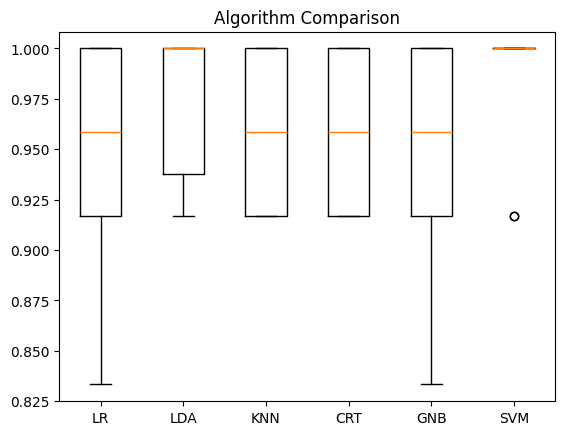

In [53]:
matplotlib.pyplot.boxplot(results, tick_labels=names)
matplotlib.pyplot.title('Algorithm Comparison')
matplotlib.pyplot.show()

## 5. Make predictions

### 5.1. Build the model with best results in prior comparison

In [55]:
model = sklearn.svm.SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

### 5.2. Evaluate predictions

In [57]:
print(sklearn.metrics.accuracy_score(Y_validation, predictions))
print(sklearn.metrics.confusion_matrix(Y_validation, predictions))
print(sklearn.metrics.classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



## 6. Conclusions

1. Support Vector Machine was the best performing algorithm for our dataset.
2. We used SVM to make predictions on our dataset (with the validation dataset)
3. This model using SVM Algorithm achieved an accuracy of 0.96 or 96%.
4. It's normal to get this high accuracies due to the size of our validation dataset, it was very small.